In [2]:
import os
import shutil
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [3]:
class_all_dict = {"alley": {"crosswalk": 0, "damaged": 1, "normal": 2, "speed_bump": 3},
                  "bike_lane": 4, 
                  "braille_guide_blocks": {"damaged": 5, "normal": 6}, 
                  "caution_zone": {"grating": 7, "manhole": 8, "repair_zone": 9, "stairs": 10, "tree_zone": 11},
                  "roadway": {"crosswalk": 12, "normal": 13},
                  "sidewalk": {"asphalt": 14, "blocks": 15, "cement": 16, "damaged": 17, "other": 18, "soil_stone": 19, "urethane": 20}}

class_dict = {"bike_lane": 0,
              "alley": {"crosswalk": 1}, 
              "roadway": {"crosswalk": 1},
              "braille_guide_blocks": 2}

In [5]:
def check_category(image):    
    for polygon in image.find_all("polygon"):
        big_class = polygon["label"]
        
        if big_class in ["bike_lane", "braille_guide_blocks"]:
            return 0
        elif polygon.find("attribute") == None:
            continue
        elif polygon.find("attribute").get_text() == "crosswalk":
            return 0
    
    return -1


def return_category(polygon):
    big_class = polygon["label"]
    
    if big_class in ["bike_lane", "braille_guide_blocks"]:
        class_poly = class_dict[big_class]
    elif polygon.find("attribute") == None:
        class_poly = -1
    elif polygon.find("attribute").get_text() == "crosswalk":
        class_poly = class_dict[big_class]["crosswalk"]
    else:
        class_poly = -1
    
    return class_poly


def return_yolo_labels(polygon):
    # max & min
    xmin, ymin, xmax, ymax = 10000, 10000, 0, 0
    
    for p in polygon["points"].split(";"):
        x, y = eval(p)
        if x < xmin:
            xmin = x
        if x > xmax:
            xmax = x
        if y < ymin:
            ymin = y
        if y > ymax:
            ymax = y
    
    # 
    dw = 1. / image_width
    dh = 1. / image_height
    x = (xmax + xmin) / 2
    y = (ymax + ymin) / 2
    w = xmax - xmin
    h = ymax - ymin
    
    return x * dw, y * dh, w * dw, h * dh

In [6]:
for i in tqdm(range(1, 301)):
    num = f"{(3 - len(str(i))) * '0'}{i}"
    IMAGE_DIRECTORY = f"./서피스마스킹/Surface_{num}/"
    MASK_DIRECTORY = f"./서피스마스킹/Surface_{num}/MASK/"
    SAVE_DIRECTORY = f"./images/"
    
    for root, directories, files in os.walk(IMAGE_DIRECTORY):
        for file in files:
            if ".xml" in file:
                xml_path = os.path.join(root, file)
                
    with open(xml_path, "r") as xml_file:
        soup = BeautifulSoup(xml_file, "xml")
    xml_file.close()

    for image in soup.find_all("image"):
        if check_category(image) == -1:
            continue
            
        data = ""
        
        image_name = image["name"]
        image_height = int(image["height"])
        image_width = int(image["width"])

        for polygon in image.find_all("polygon"):
            class_poly = return_category(polygon)
            if class_poly == -1:
                continue
            
            centerx, centery, width, height = return_yolo_labels(polygon)
                
            data = data + f"{class_poly} {centerx:.7f} {centery:.7f} {width:.7f} {height:.7f}\n"

        raw_image_path = IMAGE_DIRECTORY + image_name
        image_path = SAVE_DIRECTORY + image_name
        label_path = SAVE_DIRECTORY + image_name.split(".")[0] + ".txt"

        shutil.copyfile(raw_image_path, image_path)

        with open(label_path, "w") as label_file:
            label_file.write(data)
        label_file.close()

  0%|          | 0/300 [00:00<?, ?it/s]

In [12]:
import os

SAVE_DIRECTORY = f"./images/"

bike_lane, crosswalk, braille_block = 0, 0, 0
    
for root, directories, files in os.walk(SAVE_DIRECTORY):
    for file in files:
        if ".txt" in file:
            txt_path = os.path.join(root, file)
            
            with open(txt_path, "r") as txt_file:
                for line in txt_file.readlines():
                    class_num = line.split(" ")[0]
                    if class_num == "0":
                        bike_lane = bike_lane + 1
                    elif class_num == "1":
                        crosswalk = crosswalk + 1
                    elif class_num == "2":
                        braille_block = braille_block + 1
                    else:
                        print(line)
            txt_file.close()

bike_lane, crosswalk, braille_block

(1698, 2446, 4930)

In [15]:
import os

SAVE_DIRECTORY = f"./images/"

bike_lane, crosswalk, braille_block = 0, 0, 0
    
for root, directories, files in os.walk(SAVE_DIRECTORY):
    for file in files:
        if ".txt" in file:
            txt_path = os.path.join(root, file)
            
            with open(txt_path, "r") as txt_file:
                bike_lane_temp, crosswalk_temp, braille_block_temp = False, False, False
                for line in txt_file.readlines():
                    class_num = line.split(" ")[0]
                    if class_num == "0":
                        bike_lane_temp = True
                    elif class_num == "1":
                        crosswalk_temp = True
                    elif class_num == "2":
                        braille_block_temp = True
                    else:
                        print(line)
            txt_file.close()
            if bike_lane_temp:
                bike_lane = bike_lane + 1
            if crosswalk_temp:
                crosswalk = crosswalk + 1
            if braille_block_temp:
                braille_block = braille_block + 1

bike_lane, crosswalk, braille_block

(1434, 1610, 3490)

# Bouding Box 확인

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

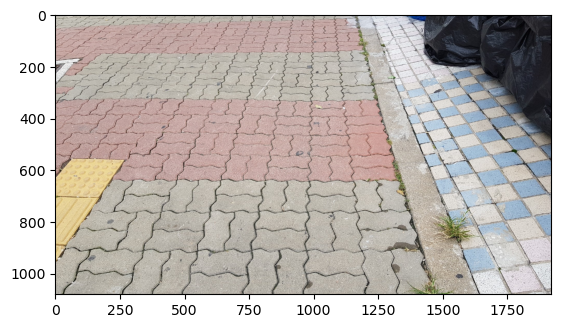

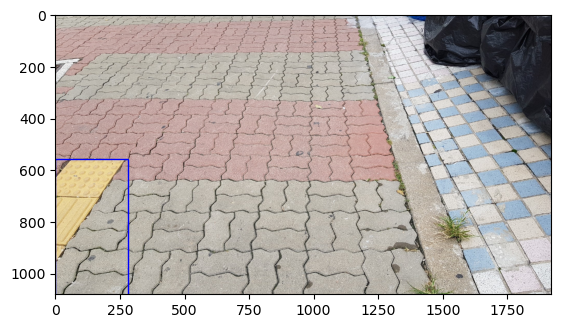

In [18]:
image_num = 46

class_num_list, x_list, y_list, xdiff_list, ydiff_list = [], [], [], [], []
color_list = ["r", "g", "b"]

save_path = f"./images/MP_SEL_SUR_{(6 - len(str(image_num))) * '0'}{image_num}"
label_path = save_path + ".txt"
image_path = save_path + ".jpg"

x = np.array(Image.open(image_path), dtype=np.uint8)
height, width, _ = x.shape

with open(label_path, "r") as txt_file:
    for line in txt_file.readlines():
        class_num, centerx, centery, xdiff, ydiff = line.split(" ")
        
        class_num_list.append(eval(class_num))
        x_list.append((eval(centerx)-eval(xdiff)/2) * width)
        xdiff_list.append(eval(xdiff) * width)
        y_list.append((eval(centery)-eval(ydiff)/2) * height)
        ydiff_list.append(eval(ydiff) * width)
        
    txt_file.close()

plt.imshow(x)
  
fig, ax = plt.subplots(1)
  
ax.imshow(x)

for i in range(len(class_num_list)):
    rect = patches.Rectangle((x_list[i], y_list[i]), xdiff_list[i], ydiff_list[i], 
                             linewidth=1, edgecolor=color_list[class_num_list[i]], facecolor="none")
    ax.add_patch(rect)
  
plt.show()